In [1]:
import pandas as pd

In [2]:
from code.bifrost import Bifrost

In [3]:
df = pd.read_csv('data/example_air_passengers.csv')
df.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


## Estimate Model Accuracy

In [4]:
print(df.shape)
seasonality = 12
train_frac = 0.9
train_num = int((train_frac * df.shape[0]) //seasonality *seasonality)
print(train_num)
df_train = df.copy(deep=True).iloc[:train_num]
df_val = df.copy(deep=True).iloc[train_num:]

(144, 2)
120


DeepNet(
  (layers): ModuleList(
    (0): Linear(in_features=13, out_features=1, bias=True)
  )
)


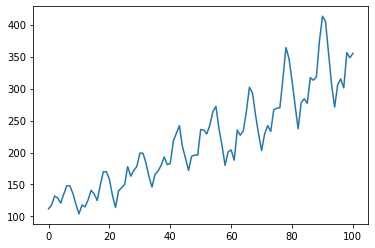

{'t_start': Timestamp('1949-01-01 00:00:00'), 't_scale': Timedelta('3591 days 00:00:00'), 'y_shift': 245.14285714285714, 'y_scale': 94.57106044763206}
time_idx.shape (108, 1)
input.shape (108, 12)
target.shape (108, 1)
1. Epoch Avg Loss:       1.00
2. Epoch Avg Loss:       0.90
3. Epoch Avg Loss:       0.83
4. Epoch Avg Loss:       0.81
5. Epoch Avg Loss:       0.76
6. Epoch Avg Loss:       0.75
7. Epoch Avg Loss:       0.68
8. Epoch Avg Loss:       0.67
9. Epoch Avg Loss:       0.62
10. Epoch Avg Loss:       0.62
11. Epoch Avg Loss:       0.62
12. Epoch Avg Loss:       0.61
13. Epoch Avg Loss:       0.61
14. Epoch Avg Loss:       0.57
15. Epoch Avg Loss:       0.57
16. Epoch Avg Loss:       0.57
17. Epoch Avg Loss:       0.57
18. Epoch Avg Loss:       0.56
19. Epoch Avg Loss:       0.54
20. Epoch Avg Loss:       0.55
21. Epoch Avg Loss:       0.55
22. Epoch Avg Loss:       0.54
23. Epoch Avg Loss:       0.54
24. Epoch Avg Loss:       0.53
25. Epoch Avg Loss:       0.55
26. Epoch Avg L

In [5]:
m = Bifrost(
    n_lags=seasonality, 
    n_forecasts=1, 
    n_trend=1, 
    normalize=True, 
    verbose=True,
)
m.fit(df_train)

In [6]:
m.test(df_val)

KeyError: 0

##  Predict the Future

In [ ]:
m.fit(df)

In [ ]:
future = m.make_future_dataframe(periods=12)
future.tail()

In [ ]:
forecast = m.predict(future)

In [ ]:
fig1 = m.plot(forecast)

In [ ]:
fig2 = m.plot_components(forecast)